# 12. A complete example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

We have seen now most of the basic features of Pandas including importing data, combining dataframes, aggregating information and plotting it. In this chapter, we are going to re-use these concepts with the real data seen in the [introduction chapter](06-DA_Pandas_introduction.ipynb). We are also going to explore some more advanced plotting libraries that exploit to the maximum dataframe structures.

## 12.1 Importing data

We are importing here two tables provided openly by the Swiss National Science Foundation. One contains a list of all *projects* to which funds have been allocated since 1975. The other table contains a list of all *people* to which funds have been awarded during the same period:

In [91]:
# import from url
projects = pd.read_csv('http://p3.snf.ch/P3Export/P3_GrantExport.csv',sep = ';')
persons = pd.read_csv('http://p3.snf.ch/P3Export/P3_PersonExport.csv',sep = ';')

We can have a brief look at both tables:

In [5]:
projects.head(5)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,1,1000-000001,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,NaN,Unassignable - NA,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,11619.00,NaN
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.00,NaN
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.00,NaN
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abteilung Handschriften und Alte Drucke Univer...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.00,NaN
4,7,1000-000007,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,Switzerland,"Non-profit organisations (libraries, museums, ...",10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.01.1976,30.04.1978,120042.00,NaN


In [6]:
persons.head(5)

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person
0,a Marca,Davide,male,NaN,NaN,53856,NaN,NaN,NaN,NaN,NaN,36549,NaN
1,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,NaN,NaN,NaN
2,A. Jafari,Golnaz,female,Universität Luzern,Luzern,747886,NaN,191432,NaN,NaN,NaN,NaN,NaN
3,Aaberg,Johan,male,NaN,NaN,575257,NaN,NaN,NaN,NaN,NaN,119868,NaN
4,Aahman,Josefin,female,NaN,NaN,629557,NaN,NaN,NaN,NaN,NaN,141014,NaN


We see that the ```persons``` table gives information such as the role of a person in various projects  (applicant, employee etc.), her/his gender etc. The *project* table on the other side gives information such as the period of a grant, how much money was awarded etc.

What if we now wish to know for example:
- How much money is awarded on average depending on gender?
- How long does it typically take for a researcher to go from employee to applicant status on a grant?

We need a way to *link* the two tables, i.e. create a large table where *each row* corresponds to a single *observation* containing information from the two tables such as: applicant, gender, awarded funds, dates etc. We will now go through all necessary steps to achieve that goal.

## 12.2 Merging tables

If each row of the persons table contained a single observation with a single person and a single project (the same person would appear of course multiple times), we could just *join* the two tables based e.g. on the project ID. Unfortunately, in the persons table, each line corresponds to a *single researcher* with all projects IDs lumped together in a list. For example:

In [19]:
persons.iloc[10040]

Last Name                                                                    Bodenmann
First Name                                                                         Guy
Gender                                                                            male
Institute Name                       Klinische Psychologie & Psychobiologie Psychol...
Institute Place                                                                 Zürich
Person ID SNSF                                                                   47670
OCRID                                                              0000-0003-0964-6409
Projects as responsible Applicant    46820;56660;62901;109547;115948;128960;129627;...
Projects as Applicant                                             112141;122090;166348
Projects as Partner                                                                NaN
Projects as Practice Partner                                                       NaN
Projects as Employee                       

In [43]:
persons.iloc[10040]['Projects as responsible Applicant']

'46820;56660;62901;109547;115948;128960;129627;129699;133004;146775;147634;173270'

Therefore the first thing we need to do is to split those strings into actual lists. We can do that by using classic Python string splitting. We simply ```apply``` that function to the relevant columns. We need to take care of rows containing NaNs on which we cannot use ```split()```. We create two series, one for applicants, one for employees:

In [95]:
projID_a = persons['Projects as responsible Applicant'].apply(lambda x: x.split(';') if not pd.isna(x) else np.nan)
projID_e = persons['Projects as Employee'].apply(lambda x: x.split(';') if not pd.isna(x) else np.nan)

In [96]:
projID_a

0              NaN
1          [67368]
2         [191432]
3              NaN
4              NaN
            ...   
110786         NaN
110787    [148582]
110788         NaN
110789         NaN
110790         NaN
Name: Projects as responsible Applicant, Length: 110791, dtype: object

In [97]:
projID_a[10040]

['46820',
 '56660',
 '62901',
 '109547',
 '115948',
 '128960',
 '129627',
 '129699',
 '133004',
 '146775',
 '147634',
 '173270']

Now, to avoid problems later we'll only keep rows that are not NaNs. We first add the two series to the dataframe and then remove NaNs:

In [99]:
pd.isna(projID_a)

0          True
1         False
2         False
3          True
4          True
          ...  
110786     True
110787    False
110788     True
110789     True
110790     True
Name: Projects as responsible Applicant, Length: 110791, dtype: bool

In [114]:
applicants = persons.copy()
applicants['projID'] = projID_a
applicants = applicants[~pd.isna(projID_a)]

employees = persons.copy()
employees['projID'] = projID_e
employees = employees[~pd.isna(projID_e)]

Now we want each of these projects to become a single line in the dataframe. Here we use a function that we haven't used before called ```explode``` which turns every element in a list into a row (a good illustration of the variety of available functions in Pandas):

In [115]:
applicants = applicants.explode('projID')
employees = employees.explode('projID')

In [116]:
applicants.head(5)

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person,projID
1,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,NaN,NaN,NaN,67368
2,A. Jafari,Golnaz,female,Universität Luzern,Luzern,747886,NaN,191432,NaN,NaN,NaN,NaN,NaN,191432
7,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,NaN,NaN,NaN,8532
7,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,NaN,NaN,NaN,9513
11,Aas,Gregor,male,Lehrstuhl für Pflanzenphysiologie Universität ...,Bayreuth,36412,NaN,52037,NaN,NaN,NaN,NaN,NaN,52037


So now we have one large table, where each row corresponds to a *single* applicant and a *single* project. We can finally do our merging operation where we combined information on persons and projects. We will do two such operations: one for applicants using the ```projID_a``` column for merging and one using the ```projID_e``` column. We have one last problem to fix:

In [117]:
applicants.loc[1].projID

'67368'

In [118]:
projects.loc[1]['Project Number']

4

We need the project ID in the persons table to be a *number* and not a *string*. We can try to convert but get an error:

In [136]:
applicants.projID = applicants.projID.astype(int)
employees.projID = employees.projID.astype(int)

It looks like we have a row that doesn't conform to expectation and only contains ''. Let's try to figure out what happened. First we find the location with the issue:

In [137]:
applicants[applicants.projID=='']

/Users/gw18g940/miniconda3/envs/danalytics/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person,projID


Then we look in the original table:

In [138]:
persons.loc[50938]

Last Name                                                                 Kleinewefers
First Name                                                                      Henner
Gender                                                                            male
Institute Name                       Séminaire de politique économique, d'économie ...
Institute Place                                                               Fribourg
Person ID SNSF                                                                   10661
OCRID                                                                              NaN
Projects as responsible Applicant                                                   8;
Projects as Applicant                                                              NaN
Projects as Partner                                                                NaN
Projects as Practice Partner                                                       NaN
Projects as Employee                       

Unfortunately, as is often the case, we have a misformatting in the original table. The project as applicant entry has a single number but still contains the ```;``` sign. Therefore when we split the text, we end up with ```['8','']```. Can we fix this? We can for example filter the table and remove rows where ```projID``` has length 0:

In [132]:
applicants = applicants[applicants.projID.apply(lambda x: len(x) > 0)]

Finally we can use ```merge``` to combine both tables. We will combine the projects (on 'Project Number') and persons table (on 'projID_a' and 'projID_e'): 

In [213]:
merged_appl = pd.merge(applicants, projects, left_on='projID', right_on='Project Number')
merged_empl = pd.merge(employees, projects, left_on='projID', right_on='Project Number')


In [214]:
applicants.head(5)

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person,projID
1,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,NaN,NaN,NaN,67368
2,A. Jafari,Golnaz,female,Universität Luzern,Luzern,747886,NaN,191432,NaN,NaN,NaN,NaN,NaN,191432
7,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,NaN,NaN,NaN,8532
7,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,NaN,NaN,NaN,9513
11,Aas,Gregor,male,Lehrstuhl für Pflanzenphysiologie Universität ...,Bayreuth,36412,NaN,52037,NaN,NaN,NaN,NaN,NaN,52037


## 12.3 Reformatting columns: time

We now have in those tables information on both scientists and projects. Among other things we now when each project of each scientist has started via the ```Start Date``` column:

In [215]:
merged_empl['Start Date']

0         01.04.1993
1         01.04.1993
2         01.04.1993
3         01.04.1993
4         01.04.1993
             ...    
127107    01.04.1991
127108    01.10.2000
127109    01.10.2008
127110    01.11.1992
127111    01.11.1998
Name: Start Date, Length: 127112, dtype: object

If we want to do computations with dates (e.g. measuring time spans) we have to change the type of the column. Currently it is indeed just a string. We could parse that string, but Pandas already offers tools to handle dates. For example we can use ```pd.to_datetime``` to transform the string into a Python ```datetime``` format. Let's create a new ```date``` column:

In [216]:
merged_empl['date'] = pd.to_datetime(merged_empl['Start Date'])
merged_appl['date'] = pd.to_datetime(merged_appl['Start Date'])

In [217]:
merged_empl.iloc[0]['date']

Timestamp('1993-01-04 00:00:00')

In [218]:
merged_empl.iloc[0]['date'].year

1993

Let's add a year column to our dataframe:

In [219]:
merged_empl['year'] = merged_empl.date.apply(lambda x: x.year)
merged_appl['year'] = merged_appl.date.apply(lambda x: x.year)

## 12.4 Completing information

As we did in the introduction, we want to be able to broadly classify projects into three categories. We therefore search for a specific string ('Humanities', 'Mathematics','Biology') within the 'Discipline Name Hierarchy' column to create a new column called 'Field'^:

In [220]:
science_types = ['Humanities', 'Mathematics','Biology']
merged_appl['Field'] = merged_appl['Discipline Name Hierarchy'].apply(
    lambda el: next((y for y in [x for x in science_types if x in el] if y is not None),None) if not pd.isna(el) else el)
                                            

We will use the amounts awarded in our analysis. Let's look at that column:

In [221]:
merged_appl['Approved Amount']

0                       20120.00
1        data not included in P3
2                      211427.00
3                      174021.00
4                        8865.00
                  ...           
74628                  262960.00
74629                  449517.00
74630                 1433628.00
74631    data not included in P3
74632    data not included in P3
Name: Approved Amount, Length: 74633, dtype: object

Problem: we have rows that are not numerical. Let's coerce that column to numerical:

In [222]:
merged_appl['Approved Amount'] = pd.to_numeric(merged_appl['Approved Amount'], errors='coerce')

## 12.5 Data anaylsis

We are finally done tidying up our tables so that we can do proper data analysis. We can *aggregate* data to answer some questions.

### 12.5.1 Amounts by gender
 Let's see for example what is the average amount awarded every year, split by gender. We keep only the 'Project funding' category to avoid obscuring the results with large funds awarded for specific projects (PNR etc):

In [223]:
merged_appl.keys()

Index(['Last Name', 'First Name', 'Gender', 'Institute Name',
       'Institute Place', 'Person ID SNSF', 'OCRID',
       'Projects as responsible Applicant', 'Projects as Applicant',
       'Projects as Partner', 'Projects as Practice Partner',
       'Projects as Employee', 'Projects as Contact Person', 'projID',
       'Project Number', 'Project Number String', 'Project Title',
       'Project Title English', 'Responsible Applicant', 'Funding Instrument',
       'Funding Instrument Hierarchy', 'Institution', 'Institution Country',
       'University', 'Discipline Number', 'Discipline Name',
       'Discipline Name Hierarchy', 'All disciplines', 'Start Date',
       'End Date', 'Approved Amount', 'Keywords', 'date', 'year', 'Field'],
      dtype='object')

In [224]:
merged_projects = merged_appl[merged_appl['Funding Instrument Hierarchy'] == 'Project funding']

In [225]:
grouped_gender = merged_projects.groupby(['Gender','year'])['Approved Amount'].mean().reset_index()
grouped_gender

,Gender,year,Approved Amount
0,female,1975.0,101433.200000
1,female,1976.0,145017.750000
2,female,1977.0,177826.157895
3,female,1978.0,141489.857143
4,female,1979.0,218496.904762
...,...,...,...
87,male,2016.0,429717.055907
88,male,2017.0,507521.397098
89,male,2018.0,582461.020513
90,male,2019.0,624826.387985


To generate a plot, we use here Seaborn which uses some elements of a grammar of graphics. For example we can assign variables to each "aspect" of our plot. Here x and y axis are year and amount while color ('hue') is the gender. In one line, we can generate a plot that compiles all the information:

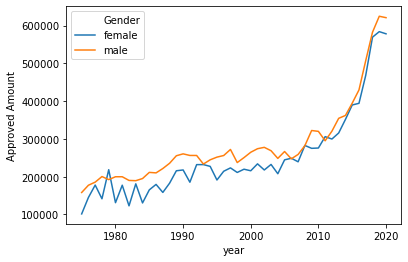

In [226]:
sns.lineplot(data = grouped_gender, x='year', y='Approved Amount', hue='Gender')

There seems to be a small but systematic difference in the average amount awarded.

We can now use a plotting library that is essentially a Python port of ggplot to add even more complexity to this plot. For example, let's split the data also by Field:

In [227]:
import plotnine as p9

In [228]:
grouped_gender_field = merged_projects.groupby(['Gender','year','Field'])['Approved Amount'].mean().reset_index()


In [229]:
grouped_gender_field

,Gender,year,Field,Approved Amount
0,female,1975.0,Biology,95049.000000
1,female,1975.0,Humanities,95451.666667
2,female,1975.0,Mathematics,125762.000000
3,female,1976.0,Biology,183154.200000
4,female,1976.0,Humanities,68590.750000
...,...,...,...,...
271,male,2019.0,Humanities,523397.013072
272,male,2019.0,Mathematics,632188.796040
273,male,2020.0,Biology,697609.302632
274,male,2020.0,Humanities,526110.955882


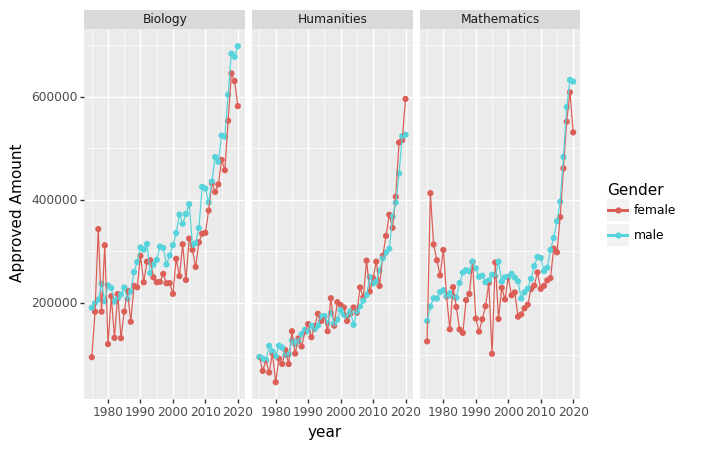

<ggplot: (326659259)>

In [230]:
(p9.ggplot(grouped_gender_field, p9.aes('year', 'Approved Amount', color='Gender'))
 + p9.geom_point()
 + p9.geom_line()
 + p9.facet_wrap('~Field'))

### 12.5.2 From employee to applicant

One of the questions we wanted to answer above was how much time goes by between the first time a scientist is mentioned as "employee" on an application and the first time he applies as main applicant. We have therefore to:
1. Find all rows corresponding to a specific scientist
2. Find the earliest date of project

For (1) we can use ```groupby``` and use the ```Person ID SNSF``` ID which is a unique ID assigned to each researcher. Once this *aggregation* is done, we can summarize each group by looking for the "minimal" date:

In [241]:
first_empl = merged_empl.groupby('Person ID SNSF').date.min().reset_index()
first_appl = merged_appl.groupby('Person ID SNSF').date.min().reset_index()

We have now two dataframes indexed by the ```Person ID```:

In [242]:
first_empl.head(5)

,Person ID SNSF,date
0,1611,1990-01-10
1,1659,1988-01-11
2,1661,1978-01-07
3,1694,1978-01-06
4,1712,1982-01-04


Now we can again merge the two series to be able to compare applicant/employee start dates for single people:

In [243]:
merge_first = pd.merge(first_appl, first_empl, on = 'Person ID SNSF', suffixes=('_appl', '_empl'))

In [245]:
merge_first

,Person ID SNSF,date_appl,date_empl
0,1659,1975-01-10,1988-01-11
1,1661,1978-01-07,1978-01-07
2,1694,1985-01-01,1978-01-06
3,1712,1982-01-04,1982-01-04
4,1726,1985-01-03,1985-01-03
...,...,...,...
10332,748652,2019-01-12,2019-01-12
10333,748760,2020-01-03,2020-01-03
10334,749430,2020-01-04,2020-01-04
10335,749991,2020-01-03,2020-01-03


Finally we merge with the full table, based on the index to recover the other paramters:

In [272]:
full_table = pd.merge(merge_first, merged_appl,on = 'Person ID SNSF')

Finally we can add a column to that dataframe as a "difference in dates":

In [288]:
test = full_table.iloc[0]['time_diff']

In [286]:
full_table['time_diff'] = full_table.date_appl-full_table.date_empl

In [289]:
full_table.time_diff = full_table.time_diff.apply(lambda x: x.days/365)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x148c98070>]],
      dtype=object)

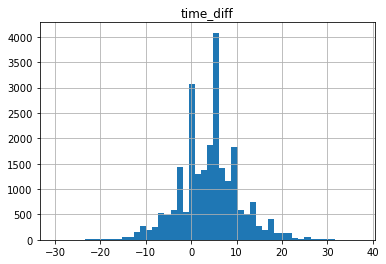

In [290]:
full_table.hist(column='time_diff',bins = 50)

We see that we have one strong peak at $\Delta T==0$ which corresponds to people who were paid for the first time through an SNSF grant when they applied themselves. The remaining cases have a peak around $\Delta T==5$ which typically corresponds to the case where a PhD student was payed on a grant and then applied for a postdoc grant ~4-5 years later.

We can go further and ask how dependent this waiting time is on the Field of research. Obviously Humanities are structured very differently 

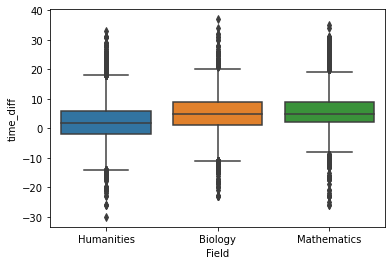

In [293]:
sns.boxplot(data=full_table, y='time_diff', x='Field', );

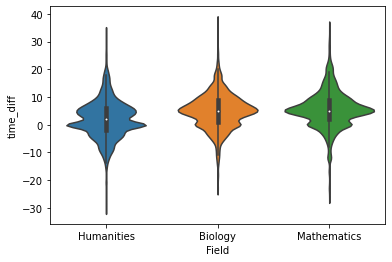

In [294]:
sns.violinplot(data=full_table, y='time_diff', x='Field', );